/var/folders/r1/8ss2m8yd3616s_v12l580jcw0000gn/T/ipykernel_20906/3984081300.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats("png2x")


[Text(0.5, 0, 'total_counts')]

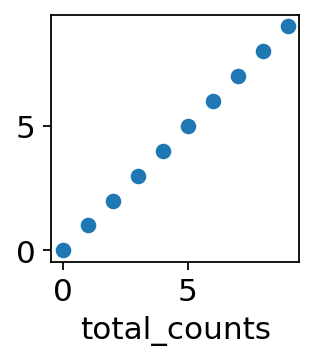

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import IPython

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 80

IPython.display.set_matplotlib_formats("png2x")
plt.back

fig, ax = plt.subplots(figsize=(2, 2))
ax.scatter(np.arange(10), np.arange(10))
ax.set(xlabel="total_counts")

In [8]:
import scanpy as sc
import anndata as ad

import pooch

In [12]:
print(sc.settings)

N_PCS = 50
autosave = False
autoshow = True
cache_compression = 'lzf'
cachedir = PosixPath('cache')
categories_to_ignore = ['N/A', 'dontknow', 'no_gate', '?']
datasetdir = PosixPath('/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/figures/data')
figdir = PosixPath('figures')
file_format_data = 'h5ad'
file_format_figs = 'pdf'
logfile = <ipykernel.iostream.OutStream object at 0x105a84af0>
logpath = None
max_memory = 15
n_jobs = 1
plot_suffix = ''
set_figure_params = <bound method ScanpyConfig.set_figure_params of <scanpy._settings.ScanpyConfig object at 0x309f2ed80>>
verbosity = <Verbosity.warning: 1>
writedir = PosixPath('write')


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [4]:
EXAMPLE_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/"
)
EXAMPLE_DATA.load_registry_from_doi()

In [5]:
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5"
}
adatas = {}

for sample_id, filename in samples.items():
    path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata
    
adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

/opt/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


sample
s1d1    8785
s1d3    8340
Name: count, dtype: int64


/opt/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'

In [6]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [7]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


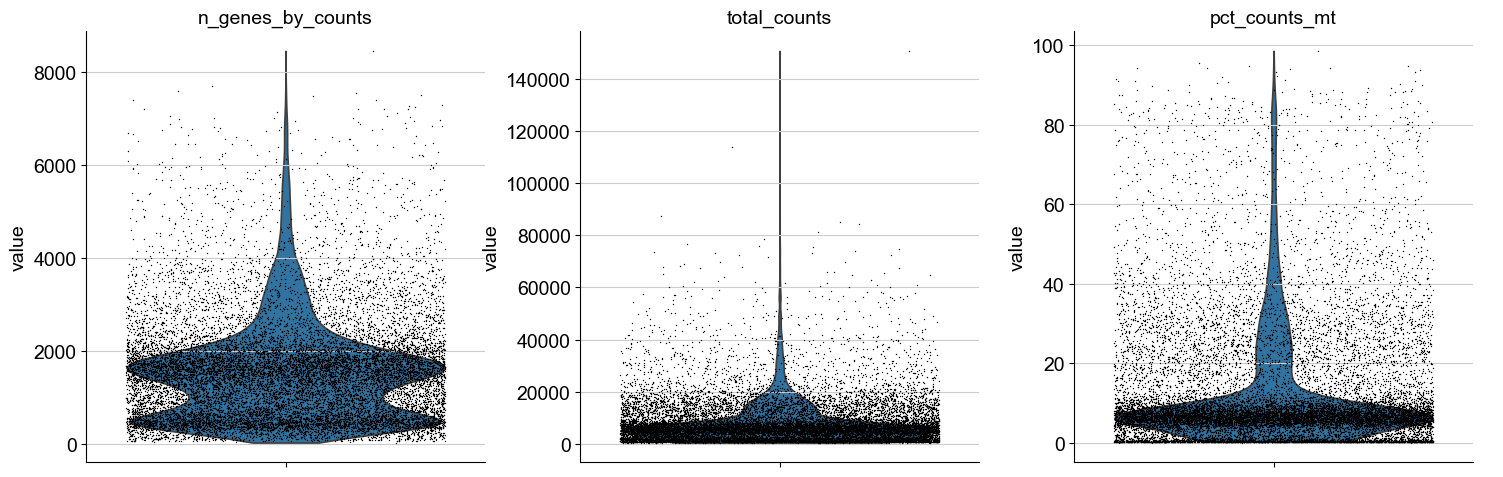

In [8]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True
)

In [10]:
from matplotlib import pyplot as plt
plt.rcParams["font.family"]

['sans-serif']

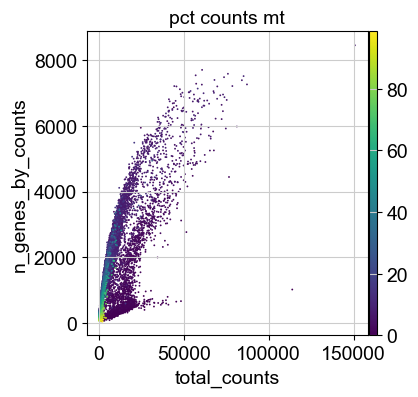

In [11]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [14]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [15]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [16]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [17]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)